In [16]:
# Import Dependencies
import warnings
warnings.filterwarnings('ignore')

In [17]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
canna_data = pd.read_csv("../clean_data.csv")

In [19]:
canna_data.head()

,Unnamed: 0,City,State,Legal Status,Legal Status Code,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita
0,0,Cedar Bluff,Alabama,Illegal,1.0,1823.0,0.002194,0.000000,0.000000,0.002194,0.019748,0.003840,0.014262,0.001646
1,1,Centre,Alabama,Illegal,1.0,3547.0,0.005639,0.001128,0.000000,0.004511,0.034959,0.003383,0.027347,0.004229
2,2,Daleville,Alabama,Illegal,1.0,5080.0,0.003150,0.000000,0.000197,0.002953,0.019291,0.003740,0.014173,0.001378
3,3,Enterprise,Alabama,Illegal,1.0,28569.0,0.004480,0.000595,0.000315,0.003500,0.025027,0.003395,0.019952,0.001680
4,4,Eufaula,Alabama,Illegal,1.0,11568.0,0.008212,0.000778,0.001297,0.005878,0.039419,0.008212,0.027490,0.003717


AttributeError: 'DataFrame' object has no attribute 'set_ylim'

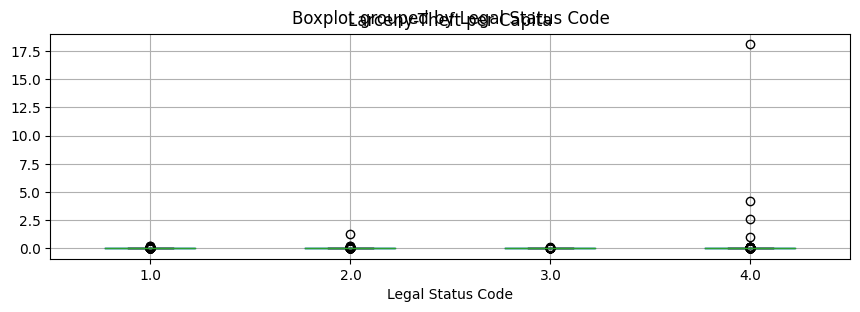

In [20]:
# Create a boxplot to compare means
canna_data.boxplot("Larceny-Theft per Capita", by="Legal Status Code", figsize=(10, 3))
canna_data.set_ylim(0, 0.5)

In [21]:
# Extract individual groups
group1lt = canna_data[canna_data["Legal Status Code"] == 1]["Larceny-Theft per Capita"]
group2lt = canna_data[canna_data["Legal Status Code"] == 2]["Larceny-Theft per Capita"]
group3lt = canna_data[canna_data["Legal Status Code"] == 3]["Larceny-Theft per Capita"]
group4lt = canna_data[canna_data["Legal Status Code"] == 4]["Larceny-Theft per Capita"]

In [22]:
# Perform the ANOVA
stats.f_oneway(group1lt, group2lt, group3lt, group4lt)

F_onewayResult(statistic=1.539953976353623, pvalue=0.20194359701598627)

In [23]:
groups = canna_data["Legal Status Code"]

In [24]:
data = canna_data["Larceny-Theft per Capita"]

In [25]:
# Perform the Tukey's HSD test
tukey = pairwise_tukeyhsd(data, groups)

# Print the results
print(tukey.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0  -0.0007 0.9996 -0.0174  0.016  False
   1.0    3.0  -0.0038 0.9765 -0.0276 0.0199  False
   1.0    4.0   0.0121 0.2976 -0.0056 0.0298  False
   2.0    3.0  -0.0031 0.9873 -0.0274 0.0211  False
   2.0    4.0   0.0127 0.2809 -0.0056 0.0311  False
   3.0    4.0   0.0159 0.3579  -0.009 0.0408  False
---------------------------------------------------


In [26]:
population1 = canna_data[canna_data["Legal Status Code"] == 1]["Larceny-Theft per Capita"]
population1.mean()

0.01443970344673266

In [27]:
# Calculate the population mean for stranger heights in Denver
population2 = canna_data[canna_data["Legal Status Code"] == 2]["Larceny-Theft per Capita"]
population2.mean()

0.013771731871261376

In [28]:
# Calculate the population mean for stranger heights in Denver
population3 = canna_data[canna_data["Legal Status Code"] == 3]["Larceny-Theft per Capita"]
population3.mean()

0.010636091418189482

In [29]:
population4 = canna_data[canna_data["Legal Status Code"] == 4]["Larceny-Theft per Capita"]
population4.mean()

0.026510718589906994

In [30]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=0.9352155679365282, pvalue=0.3497550971148381)